In [83]:
# !pip install TikTokApi nest_asyncio

def print_keys(nested_dict, parent_key=''):
    if not isinstance(nested_dict, dict):
        return

    for key, value in nested_dict.items():
        full_key = f"{parent_key}.{key}" if parent_key else key
        print(full_key)
        if isinstance(value, dict):
            print_keys(value, full_key)

In [210]:
!pip install pyktok beautifulsoup4 browser-cookie3 numpy pandas requests selenium streamlit



Looking in indexes: https://pypi.org/simple, https://pypi.org/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 151.2 kB/s eta 0:00:00 kB/s eta 0:00:01
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached GitPython-3.1.43-py3-none-any.whl.metadata (13 kB)
  Using cached gitdb-4.0.11-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.1-py3-none-any.whl.metadata (4.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 4.9 MB/s eta 0:00:00m eta 0:00:010:01:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 16.2 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 16.6 MB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 18.3 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.8/857.8

In [244]:
import asyncio
import os
from TikTokApi import TikTokApi
import nest_asyncio
nest_asyncio.apply()

# Ensure you have your ms_token set correctly : refer https://surenjanath.medium.com/scraping-hidden-api-with-python-requests-eg-tiktok-80f2daea8e5
ms_token = [ms-token]

import json

async def trending_videos():
    try:
        video_data = []
        async with TikTokApi() as api:
            # print("TikTokApi session started")  # Debugging step
            await api.create_sessions(ms_tokens=[ms_token], num_sessions=1, sleep_after=20, headless=False)
            async for video in api.trending.videos(count=25):
                video_dict = video.as_dict
                video_data.append(video_dict)
                # print(video_dict)  # Optional: Print each video's data for debugging
            # print("Finished fetching videos")  # Debugging step
        return video_data
    except Exception as e:
        print(f"An error occurred: {e}")
        return []

# Running the asyncio event loop
videos = await trending_videos()
# # print(json.dumps(videos, indent=4))
# vid_urls = [i["video"]["bitrateInfo"][0]["PlayAddr"]["UrlList"][0] for i in videos]
# vid_urls

In [255]:
def extract_relevant_info(data_list):
    result = []
    for item in data_list:
        try:
            # Extracting relevant information from contents
            contents_data = []
            if "contents" in item:
                for content in item["contents"]:
                    hashtags = [extra["hashtagName"] for extra in content.get("textExtra", []) if "hashtagName" in extra]
                    content_data = {
                        "desc": content.get("desc", ""),
                        "hashtags": hashtags
                    }
                    contents_data.append(content_data)

            smaller_dict = {
                "author_signature": item["author"]["signature"],
                "author_nickname": item["author"]["nickname"],
                "authorStats": {
                    "diggCount": item["authorStats"]["diggCount"],
                    "followerCount": item["authorStats"]["followerCount"],
                    "followingCount": item["authorStats"]["followingCount"],
                    "friendCount": item["authorStats"]["friendCount"],
                    "heart": item["authorStats"]["heart"],
                    "heartCount": item["authorStats"]["heartCount"],
                    "videoCount": item["authorStats"]["videoCount"]
                },
                "statsV2": {
                    "collectCount": item["statsV2"]["collectCount"],
                    "commentCount": item["statsV2"]["commentCount"],
                    "diggCount": item["statsV2"]["diggCount"],
                    "playCount": item["statsV2"]["playCount"],
                    "repostCount": item["statsV2"]["repostCount"],
                    "shareCount": item["statsV2"]["shareCount"]
                },
                "contents": contents_data
            }
            smaller_dict["id"]=item["id"]
            result.append(smaller_dict)
            
        except KeyError as e:
            print(f"KeyError: {e}")
            continue
    return result

videos_data = extract_relevant_info(videos)
videos_data

[{'author_signature': 'Hairstyle/Beauty 😎 \n#AlgérienneCapable 🇩🇿\nCollaboration.ciliaghass@gmail.com',
  'author_nickname': 'Cilia ghass ⵣ',
  'authorStats': {'diggCount': 37500,
   'followerCount': 5000000,
   'followingCount': 130,
   'friendCount': 0,
   'heart': 115500000,
   'heartCount': 115500000,
   'videoCount': 231},
  'statsV2': {'collectCount': '79499',
   'commentCount': '7215',
   'diggCount': '1502807',
   'playCount': '33349727',
   'repostCount': '0',
   'shareCount': '12473'},
  'contents': [{'desc': "I'm taking care of my son, he asked me for a haircut furiously 😒 why doesn't anyone take me seriously? 🤦🏽\u200d♀️ #cut #hair #son #hairstyle #fast #and #furious ",
    'hashtags': ['cut',
     'hair',
     'son',
     'hairstyle',
     'fast',
     'and',
     'furious']}],
  'id': '7354832022881193249'},
 {'author_signature': 'כתובת זאב זבוטנסקי 28 ר״ג\n    סקיילרית בתיקונים. 🙋\u200d♀️',
  'author_nickname': 'Tamar MTmobile',
  'authorStats': {'diggCount': 1276,
   'fo

In [246]:
import asyncio
from TikTokApi import TikTokApi  # Assuming TikTokApi is installed and imported correctly

video_id = '7376014969512398112'

async def get_comments(video_id):
    try:
        async with TikTokApi() as api:
            await api.create_sessions(ms_tokens=[ms_token], num_sessions=1, sleep_after=3, headless=False)
            # video = async api.video(id=video_id)
            count = 0
            comments=[]
            async for comment in api.video(id=video_id).comments(count=20):
                # print(comment)
                comments.append(comment)
                # print(comment.as_dict())
        return comments
    except Exception as e:
        print(f"An error occurred: {e}")

comments = asyncio.run(get_comments(video_id))
comments = [i.text for i in comments]


In [257]:
for i in range(len(videos_data)):
    video_id = videos_data[i]["id"]
    tmp_comments = asyncio.run(get_comments(video_id))
    tmp_comments = [i.text for i in tmp_comments]
    videos_data[i]["comments"]=tmp_comments
    
videos_data

[{'author_signature': 'Hairstyle/Beauty 😎 \n#AlgérienneCapable 🇩🇿\nCollaboration.ciliaghass@gmail.com',
  'author_nickname': 'Cilia ghass ⵣ',
  'authorStats': {'diggCount': 37500,
   'followerCount': 5000000,
   'followingCount': 130,
   'friendCount': 0,
   'heart': 115500000,
   'heartCount': 115500000,
   'videoCount': 231},
  'statsV2': {'collectCount': '79499',
   'commentCount': '7215',
   'diggCount': '1502807',
   'playCount': '33349727',
   'repostCount': '0',
   'shareCount': '12473'},
  'contents': [{'desc': "I'm taking care of my son, he asked me for a haircut furiously 😒 why doesn't anyone take me seriously? 🤦🏽\u200d♀️ #cut #hair #son #hairstyle #fast #and #furious ",
    'hashtags': ['cut',
     'hair',
     'son',
     'hairstyle',
     'fast',
     'and',
     'furious']}],
  'id': '7354832022881193249',
  'comments': ['Porque le tapa el rostro al niño y no a la niña ?',
   'te pedí un corte 🗣️🗣️🗣️',
   'me encanta que cuida la imagen del niño 😁',
   'no aguantaba la ri

In [178]:
import asyncio
from TikTokApi import TikTokApi  # Assuming TikTokApi is installed and imported correctly

video_id = '7376014969512398112'

async def get_comments(video_id):
    try:
        async with TikTokApi() as api:
            await api.create_sessions(ms_tokens=[ms_token], num_sessions=1, sleep_after=3, headless=False)
            # video = async api.video(id=video_id)
            count = 0
            comments=[]
            async for comment in api.video(id=video_id).comments(count=5):
                # print(comment)
                comments.append(comment)
                # print(comment.as_dict())
        return comments
    except Exception as e:
        print(f"An error occurred: {e}")

comments = asyncio.run(get_comments(video_id))
comments = [i.text for i in comments]


'Que es hip dips'

In [220]:
import pyktok as pyk

test_vid = extract_relevant_info(videos)[1]

video_url = f"https://www.tiktok.com/@{test_vid['author_nickname']}/video/{test_vid['id']}"



pyk.specify_browser('chrome')

pyk.save_tiktok(video_url+'?is_copy_url=1&is_from_webapp=v1',True,'video_data.csv','chrome')


Saved video
 https://v16-webapp-prime.tiktok.com/video/tos/alisg/tos-alisg-pve-0037c001/oEtn3VAcgQs9WtiDbeMIrMOC9Rfnomi8AAfWXj/?a=1988&bti=ODszNWYuMDE6&ch=0&cr=3&dr=0&lr=tiktok_m&cd=0%7C0%7C1%7C&cv=1&br=5404&bt=2702&cs=0&ds=3&ft=4fUEKMUm8Zmo0Jiop-4jV78hrpWrKsd.&mime_type=video_mp4&qs=0&rc=ZGlmNDpnODk6ODRmZTVkN0BpamV3eGw5cnZnczMzODczNEBgNTAxLV5jX14xYmNgL15eYSMwZ2NrMmRzcXFgLS1kMTFzcw%3D%3D&btag=e00088000&expire=1719867003&l=2024070114493614645CAFF6E9730BB189&ply_type=2&policy=2&signature=5dd67ab3ffed471c94de1fa5790d5f6d&tk=tt_chain_token 
to
 /Users/pushkar.aggrawal/chima
Saved metadata for video
 https://www.tiktok.com/@Kirill Multitool/video/7384459894696463624?is_copy_url=1&is_from_webapp=v1 
to
 /Users/pushkar.aggrawal/chima


In [221]:
import av
import numpy as np
import torch
from transformers import AutoImageProcessor, AutoTokenizer, VisionEncoderDecoderModel

device = "cuda" if torch.cuda.is_available() else "cpu"

# load pretrained processor, tokenizer, and model
# image_processor = AutoImageProcessor.from_pretrained("MCG-NJU/videomae-base")
# tokenizer = AutoTokenizer.from_pretrained("gpt2")
# model = VisionEncoderDecoderModel.from_pretrained("Neleac/timesformer-gpt2-video-captioning").to(device)

# load video
video_path = "@Kirill Multitool_video_7384459894696463624.mp4"
container = av.open(video_path)

# extract evenly spaced frames from video
seg_len = container.streams.video[0].frames
clip_len = model.config.encoder.num_frames
indices = set(np.linspace(0, seg_len, num=clip_len, endpoint=False).astype(np.int64))
frames = []
container.seek(0)
for i, frame in enumerate(container.decode(video=0)):
    if i in indices:
        frames.append(frame.to_ndarray(format="rgb24"))

# generate caption
gen_kwargs = {
    "min_length": 10, 
    "max_length": 20, 
    "num_beams": 8,
}
pixel_values = image_processor(frames, return_tensors="pt").pixel_values.to(device)
tokens = model.generate(pixel_values, **gen_kwargs)
caption = tokenizer.batch_decode(tokens, skip_special_tokens=True)[0]
print(caption) 


A man is demonstrating how to properly carve a ball of grass.


In [258]:
# videos_data = extract_relevant_info(videos)
# for i in range(len(comments)):
#     videos_data[i]["comments"]=comments[i]
videos_data

[{'author_signature': 'Hairstyle/Beauty 😎 \n#AlgérienneCapable 🇩🇿\nCollaboration.ciliaghass@gmail.com',
  'author_nickname': 'Cilia ghass ⵣ',
  'authorStats': {'diggCount': 37500,
   'followerCount': 5000000,
   'followingCount': 130,
   'friendCount': 0,
   'heart': 115500000,
   'heartCount': 115500000,
   'videoCount': 231},
  'statsV2': {'collectCount': '79499',
   'commentCount': '7215',
   'diggCount': '1502807',
   'playCount': '33349727',
   'repostCount': '0',
   'shareCount': '12473'},
  'contents': [{'desc': "I'm taking care of my son, he asked me for a haircut furiously 😒 why doesn't anyone take me seriously? 🤦🏽\u200d♀️ #cut #hair #son #hairstyle #fast #and #furious ",
    'hashtags': ['cut',
     'hair',
     'son',
     'hairstyle',
     'fast',
     'and',
     'furious']}],
  'id': '7354832022881193249',
  'comments': ['Porque le tapa el rostro al niño y no a la niña ?',
   'te pedí un corte 🗣️🗣️🗣️',
   'me encanta que cuida la imagen del niño 😁',
   'no aguantaba la ri

In [262]:
from langchain import PromptTemplate
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-3.5-turbo-0125")

prompt_template = """/
You are a social media analyst. You are provided with metadata for a tiktok post.
Retain statistical info and hashtags. 
Aggregate cleaner semantics from comments and other text.
Synthesise a better description for the post itself.
{video}
"""

prompt = PromptTemplate.from_template(template=prompt_template)

clean_video_data = []
for video in videos_data:
    clean_video_data.append(llm.predict(prompt.format(video=video)))

clean_video_data

/Users/pushkar.aggrawal/.pyenv/versions/3.10.12/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `BaseChatModel.predict` was deprecated in langchain-core 0.1.7 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(
--- Logging error ---
Traceback (most recent call last):
  File "/Users/pushkar.aggrawal/.pyenv/versions/3.10.12/lib/python3.10/site-packages/langchain_core/callbacks/manager.py", line 2009, in _configure
    handler = LangChainTracer(
  File "/Users/pushkar.aggrawal/.pyenv/versions/3.10.12/lib/python3.10/site-packages/langchain_core/tracers/langchain.py", line 91, in __init__
    self.client = client or get_client()
  File "/Users/pushkar.aggrawal/.pyenv/versions/3.10.12/lib/python3.10/site-packages/langchain_core/tracers/langchain.py", line 54, in get_client
    _CLIENT = Client()
  File "/Users/pushkar.aggrawal/.pyenv/versions/3.10.12/lib/python3.10/site-packages/langsmith/client.py", line 559, in _

["Description: A hairstylist and beauty influencer, Cilia Ghass, showcases her skills as she gives her son a haircut in response to his urgent request. Despite her playful frustration, she ensures a stylish result. The post captures the amusing interaction between a mother and her son, with a touch of fast and furious energy. #cut #hair #son #hairstyle #fast #and #furious\n\nStatistical Info:\n- Followers: 5,000,000\n- Likes: 115,500,000\n- Comments: 7,215\n- Shares: 12,473\n- Video Views: 33,349,727\n- Digg Count: 1,502,807\n\nHashtags:\n- #cut\n- #hair\n- #son\n- #hairstyle\n- #fast\n- #and\n- #furious\n\nComments:\n- The commenters express admiration for the care and skill shown in the haircut.\n- Some question why the son's face is covered during the process.\n- There is appreciation for the mother's ability to multitask and care for her child's appearance.\n- Overall, the comments reflect a positive response to the heartwarming and humorous content of the post.",
 'Description: Wa

In [265]:
len(clean_video_data),clean_video_data

(25,
 ["Description: A hairstylist and beauty influencer, Cilia Ghass, showcases her skills as she gives her son a haircut in response to his urgent request. Despite her playful frustration, she ensures a stylish result. The post captures the amusing interaction between a mother and her son, with a touch of fast and furious energy. #cut #hair #son #hairstyle #fast #and #furious\n\nStatistical Info:\n- Followers: 5,000,000\n- Likes: 115,500,000\n- Comments: 7,215\n- Shares: 12,473\n- Video Views: 33,349,727\n- Digg Count: 1,502,807\n\nHashtags:\n- #cut\n- #hair\n- #son\n- #hairstyle\n- #fast\n- #and\n- #furious\n\nComments:\n- The commenters express admiration for the care and skill shown in the haircut.\n- Some question why the son's face is covered during the process.\n- There is appreciation for the mother's ability to multitask and care for her child's appearance.\n- Overall, the comments reflect a positive response to the heartwarming and humorous content of the post.",
  'Descript

## Multiagent System

In [268]:
import getpass
import os


def _set_if_undefined(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"Please provide your {var}")


_set_if_undefined("OPENAI_API_KEY")
_set_if_undefined("TAVILY_API_KEY")


Please provide your TAVILY_API_KEY ········


In [223]:
!pip install -U langchain langchain_openai langsmith pandas langchain_experimental matplotlib langgraph langchain_core


Looking in indexes: https://pypi.org/simple, https://pypi.org/simple/
  Using cached async_timeout-4.0.3-py3-none-any.whl.metadata (4.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.4/109.4 kB 362.3 kB/s eta 0:00:00 kB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.2 MB/s eta 0:00:004.7 MB/s eta 0:00:01
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 969.9 kB/s eta 0:00:001.0 MB/s eta 0:00:01
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl.metadata (4.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 975.5/975.5 kB 3.0 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.4/127.4 kB 344.6 kB/s eta 0:00:0031m1.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.7/202.7 kB 7.0 MB/s eta 0:00:00


In [224]:
from langchain_core.messages import (
    BaseMessage,
    HumanMessage,
    ToolMessage,
)
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

from langgraph.graph import END, StateGraph


def create_agent(llm, tools, system_message: str):
    """Create an agent."""
    prompt = ChatPromptTemplate.from_messages(
        [
            (
                "system",
                "You are a helpful AI assistant, collaborating with other assistants."
                " Use the provided tools to progress towards answering the question."
                " If you are unable to fully answer, that's OK, another assistant with different tools "
                " will help where you left off. Execute what you can to make progress."
                " If you or any of the other assistants have the final answer or deliverable,"
                " prefix your response with FINAL ANSWER so the team knows to stop."
                " You have access to the following tools: {tool_names}.\n{system_message}",
            ),
            MessagesPlaceholder(variable_name="messages"),
        ]
    )
    prompt = prompt.partial(system_message=system_message)
    prompt = prompt.partial(tool_names=", ".join([tool.name for tool in tools]))
    return prompt | llm.bind_tools(tools)

In [393]:
from typing import Annotated
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.tools import tool

tavily_tool = TavilySearchResults(max_results=5)

@tool
def tiktok_trend_insight(
    request: Annotated[str, "Request for information on tiktok trends"],
):
    """The best tool to know what's trending and loved on tiktok."""
    prompt_template = """
    For the given request. Return relevant and significant patterns from tiktok.
    Request : {request}
    Trending tiktok posts for reference : """ + str(clean_video_data[:10])
    
    prompt = PromptTemplate.from_template(template=prompt_template)
    
    return llm.predict(prompt.format(request=request))

In [432]:
tavily_tool.name

'tavily_search_results_json'

In [394]:
import operator
from typing import Annotated, Sequence, TypedDict

from langchain_openai import ChatOpenAI


# This defines the object that is passed between each node
# in the graph. We will create different nodes for each agent and tool
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]
    sender: str

In [496]:
import functools

from langchain_core.messages import AIMessage


# Helper function to create a node for a given agent
def agent_node(state, agent, name):
    result = agent.invoke(state)
    if isinstance(result, ToolMessage):
        pass
    else:
        result = AIMessage(**result.dict(exclude={"type", "name"}), name=name)
    return {
        "messages": [result],
        "sender": name,
    }


llm = ChatOpenAI(model="gpt-3.5-turbo-0125",temperature=0.2)

# strategist 
# https://www.youtube.com/watch?v=XSC9rmqa1TU&ab_channel=WhiteClaw

strategy_agent = create_agent(
    llm,
    [tiktok_trend_insight,tavily_tool],
    system_message="""Develop social media marketing campaigns strategies aligned with Whiteclaw’s brand identity - a beer company marketing as a socialization catalyst.
    Suggest specific content ideas, challenges, and collaborations with influencers that align with Whiteclaw's brand image and target audience. Thorough analysis and provide unique insights.
    First get full clarity on a detailed strategy by leveraging crucial tiktok analyst (return "HELP_TIKTOK_ANALYST") then use global search (return "HELP_INTERNET_SEARCH"). Only when an end to end strategy is created, send it to the campaign creator (say "STRATEGY_DONE").""",
)
strategist_node = functools.partial(agent_node, agent=strategy_agent, name="Strategist")

creator_agent = create_agent(
    llm,
    [tavily_tool],
    system_message="""Given a solid marketing strategy, create a detailed fun social media marketing campaign using search tool. 
    Write posts for Whiteclaw socials. Include visuals, captions, specific spanish celebrity collaborations (name a relevant trending celeb) relevant to whiteclaw, and hashtags for each post.
    Strictly when such a set of social media stories is made by you, say CAMPAIGN_DONE. Otherwise continue refining the posts.""",
)
creator_node = functools.partial(agent_node, agent=creator_agent, name="Campaign_Creator")

analyst_agent = create_agent(
    llm,
    [tiktok_trend_insight],
    system_message="""Create distilled insights from tiktok trends tool for the strategist. """,
)
analyst_node = functools.partial(agent_node, agent=creator_agent, name="Tiktok_Analyst")





In [497]:
from langgraph.prebuilt import ToolNode

tools = [tavily_tool,tiktok_trend_insight]
tool_node = ToolNode(tools)

In [498]:
# Either agent can decide to end
from typing import Literal


def router(state) -> Literal["call_tool", "__end__", "continue","Tiktok_Analyst","STRATEGY_DONE","CAMPAIGN_DONE"]:
    # This is the router
    messages = state["messages"]
    last_message = messages[-1]
    if last_message.tool_calls:
        return "call_tool"
    if "HELP_INTERNET_SEARCH" in last_message.content:
        return "call_tool"
    if "FINAL_ANSWER" in last_message.content:
        return "__end__"
    if "HELP_TIKTOK_ANALYST" in last_message.content:
        return "tiktok_trend_insight"
    if "STRATEGY_DONE" in last_message.content:
        return "STRATEGY_DONE"
    if "CAMPAIGN_DONE" in last_message.content:
        return "CAMPAIGN_DONE"
    

    return "continue"

In [499]:
workflow = StateGraph(AgentState)

workflow.add_node("Campaign_Creator", creator_node)
workflow.add_node("Tiktok_Analyst", analyst_node)
workflow.add_node("Strategist", strategist_node)
workflow.add_node("call_tool", tool_node)


workflow.add_conditional_edges(
    "Tiktok_Analyst",
    router,
    {"continue": "Strategist"},
)

workflow.add_conditional_edges(
    "Strategist",
    router,
    {"tiktok_trend_insight": "Tiktok_Analyst","STRATEGY_DONE":"Campaign_Creator", "call_tool": "call_tool", "continue":"Campaign_Creator"},
)

workflow.add_conditional_edges(
    "call_tool",
    lambda x: x["sender"],
    {
        "Campaign_Creator": "Campaign_Creator",
        "Tiktok_Analyst": "Tiktok_Analyst",
        "Strategist":"Strategist"
    },
)

workflow.add_conditional_edges(
    "Campaign_Creator",
    router,
    {"call_tool": "call_tool", "continue":"Campaign_Creator", "__end__": END, "CAMPAIGN_DONE":END},
)

workflow.set_entry_point("Strategist")
graph = workflow.compile()

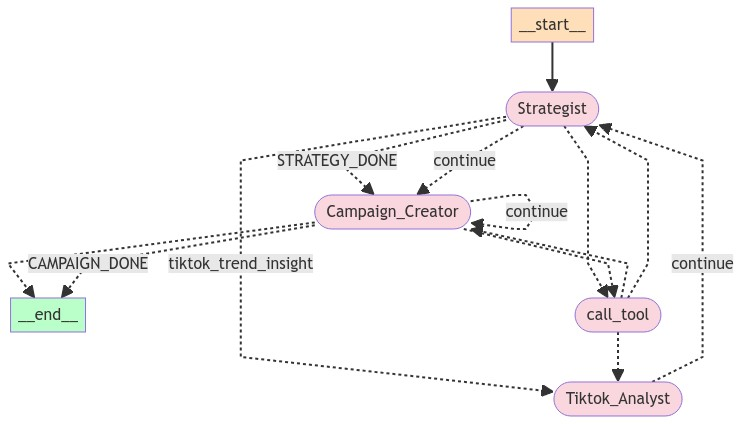

In [500]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [502]:
events = graph.stream(
    {
        "messages": [
            HumanMessage(
                content="Understand patterns within tiktok trends. Understand all facets. Create a good marketing strategy. Create multiple instagram posts with hashtags for me"
            )
        ],
    },
    # Maximum number of steps to take in the graph
    {"recursion_limit": 150},
)
for s in events:
    print(s)
    print("----")

{'Strategist': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_zp7zYgNkQKRVAmeJL7kRFtXX', 'function': {'arguments': '{"request":"HELP_TIKTOK_ANALYST"}', 'name': 'tiktok_trend_insight'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 368, 'total_tokens': 393}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, name='Strategist', id='run-057d8edc-f7e2-43b2-8f8e-cf176afe8137-0', tool_calls=[{'name': 'tiktok_trend_insight', 'args': {'request': 'HELP_TIKTOK_ANALYST'}, 'id': 'call_zp7zYgNkQKRVAmeJL7kRFtXX'}], usage_metadata={'input_tokens': 368, 'output_tokens': 25, 'total_tokens': 393})], 'sender': 'Strategist'}}
----
{'call_tool': {'messages': [ToolMessage(content="Some relevant and significant patterns from the trending TikTok posts are:\n\n1. Hairstyle transformations: Posts showcasing unique and mesmerizing hairstyle transformations for b

# ROUGH

In [400]:
events = graph.stream(
    {
        "messages": [
            HumanMessage(
                content="Understand patterns within tiktok trends. Understand all facets. Create a good marketing strategy. Convert the strategy to a marketing campaign"
            )
        ],
    },
    # Maximum number of steps to take in the graph
    {"recursion_limit": 150},
)
for s in events:
    print(s)
    print("----")

{'Strategist': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_K8BPL4WbakvmTy3g1OjgblaJ', 'function': {'arguments': '{"request":"HELP TIKTOK ANALYST"}', 'name': 'tiktok_trend_insight'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 268, 'total_tokens': 293}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, name='Strategist', id='run-485b46c0-c013-475d-969b-169d973694fb-0', tool_calls=[{'name': 'tiktok_trend_insight', 'args': {'request': 'HELP TIKTOK ANALYST'}, 'id': 'call_K8BPL4WbakvmTy3g1OjgblaJ'}], usage_metadata={'input_tokens': 268, 'output_tokens': 25, 'total_tokens': 293})], 'sender': 'Strategist'}}
----
{'call_tool': {'messages': [ToolMessage(content="Based on the trending TikTok posts provided, here are some relevant and significant patterns:\n\n1. **Skill Demonstrations**: Several posts showcase individuals demonstrating thei

BadRequestError: Error code: 400 - {'error': {'message': "Invalid 'messages[8].name': string does not match pattern. Expected a string that matches the pattern '^[a-zA-Z0-9_-]+$'.", 'type': 'invalid_request_error', 'param': 'messages[8].name', 'code': 'invalid_value'}}

In [191]:
async def get_video(video_id):
    # try:
        async with TikTokApi() as api:
            await api.create_sessions(ms_tokens=[ms_token], num_sessions=1, sleep_after=3, headless=False)
            video_bytes = api.video(id=video_id)
            await video.bytes()
            
            # return api.video(id=video_id).bytes()

                # Saving The Video
            with open('saved_video.mp4', 'wb') as output:
                output.write(video_bytes)
    # except Exception as e:
    #     print(f"An error occurred: {e}")

asyncio.run(get_video(video_id))


# py video = api.video(id='7041997751718137094')

# video = api.video(id='7041997751718137094')

# async with TikTokApi() as api:
#     await api.create_sessions(ms_tokens=[ms_token], num_sessions=1, sleep_after=3, headless=False)
#     api.video(id='7041997751718137094').bytes()


# video_bytes = api.video(id='7041997751718137094').bytes()

# # Saving The Video
# with open('saved_video.mp4', 'wb') as output:
#     output.write(video_bytes)

Exception ignored in: <coroutine object Video.bytes at 0x10c485770>
Traceback (most recent call last):
  File "<string>", line 1, in <lambda>
KeyError: '__import__'
Exception ignored in: <coroutine object Video.bytes at 0x10c485770>
Traceback (most recent call last):
  File "<string>", line 1, in <lambda>
KeyError: '__import__'
Exception ignored in: <coroutine object Video.bytes at 0x10a976730>
Traceback (most recent call last):
  File "<string>", line 1, in <lambda>
KeyError: '__import__'
Exception ignored in: <coroutine object Video.bytes at 0x109c72500>
Traceback (most recent call last):
  File "<string>", line 1, in <lambda>
KeyError: '__import__'


NotImplementedError: 

In [197]:
!pip install yt_dlp
from TikTokApi import TikTokApi
from yt_dlp import YoutubeDL
import asyncio
import os

ms_token = os.environ.get("multi_sids", None) 
ydl_opts = {
    'outtmpl': '%(uploader)s_%(id)s_%(timestamp)s.%(ext)s',
}

async def download_user_videos(username):
    async with TikTokApi() as api:
        await api.create_sessions(ms_tokens=[ms_token], num_sessions=1, sleep_after=3, 
                                  headless=False, suppress_resource_load_types=["image", "media", "font", "stylesheet"])

        user = api.user(username)
        videos = user.videos()

        async for video in videos:
            print(f"Username: {video.author.username}")
            print(f"Video ID: {video.id}")
            print(f"Stats: {video.stats}")

            video_url = f"https://www.tiktok.com/@{username}/video/{video.id}"
            with YoutubeDL(ydl_opts) as ydl:
                ydl.download([video_url])

username = 'Francinefadairo'
asyncio.run(download_user_videos(username))



Looking in indexes: https://pypi.org/simple, https://pypi.org/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.7/167.7 kB 286.9 kB/s eta 0:00:000:00:010:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 4.0 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.3/121.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 873.0/873.0 kB 18.7 MB/s eta 0:00:00m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 24.0 MB/s eta 0:00:00 MB/s eta 0:00:01:01


/Users/pushkar.aggrawal/.pyenv/versions/3.10.12/lib/python3.10/inspect.py:820: RuntimeWarning: coroutine 'Video.bytes' was never awaited
  if any(filename.endswith(s) for s in all_bytecode_suffixes):


KeyError: 'user'

In [75]:
[i["video"]["bitrateInfo"][-1]["PlayAddr"]["UrlList"][-1] for i in videos]

['https://v19-webapp-prime.tiktok.com/video/tos/alisg/tos-alisg-pve-0037c001/osINEojeKUbIlDIjHWQM7QLlY4IGfMADAHfngC/?a=1988&bti=NDU3ZjAwOg%3D%3D&ch=0&cr=3&dr=0&lr=unwatermarked&cd=0%7C0%7C0%7C&cv=1&br=1502&bt=751&cs=2&ds=6&ft=4fUEKMUm8Zmo0Cxwp-4jV2GhrpWrKsd.&mime_type=video_mp4&qs=11&rc=aGg0M2gzPDw8NDM5Omc2M0BpM3VueXk5cjs4cjMzODczNEAyX2FfY2JhNS8xY2M0YjRjYSNgYnByMmRzNmRgLS1kMTFzcw%3D%3D&btag=e00090000&expire=1720008437&l=2024070112044337348911017E78F2A6D4&ply_type=2&policy=2&signature=d32aeea644c88fa21f9195a409621a2e&tk=tt_chain_token',
 'https://v19-webapp-prime.tiktok.com/video/tos/maliva/tos-maliva-ve-0068c799-us/o0WwDDPQwGFoDJLfEgreGSmChCR5XAgWEI8Bg7/?a=1988&bti=NDU3ZjAwOg%3D%3D&ch=0&cr=3&dr=0&lr=unwatermarked&cd=0%7C0%7C0%7C&cv=1&br=792&bt=396&cs=0&ds=6&ft=4fUEKMUm8Zmo0Cxwp-4jV2GhrpWrKsd.&mime_type=video_mp4&qs=5&rc=ZmRoNmYzPDQ5NGk5OjY2PEBpM2VzM285cmw7czMzZzczNEBgNi4uNTIwXmExMWMwYzA2YSNgbW9wMmRzNGNgLS1kMS9zcw%3D%3D&btag=e00090000&expire=1720008348&l=2024070112044337348911017E78F2A6

In [68]:
videos[1].keys()
def print_keys(nested_dict, parent_key=''):
    for key, value in nested_dict.items():
        full_key = f"{parent_key}.{key}" if parent_key else key
        print(full_key)
        if isinstance(value, dict):
            print_keys(value, full_key)

# Example nested dictionary
nested_dict = {
    'a': 1,
    'b': {
        'c': 2,
        'd': {
            'e': 3,
            'f': 4,
        },
    },
    'g': {
        'h': 5,
    },
}

# videos[1]["video"]["size"],\
# [i["video"]["videoQuality"] for i in videos]
vid_urls = [i["video"]["bitrateInfo"][0]["PlayAddr"]["UrlList"][0] for i in videos]
# authorStats.diggCount
# authorStats.followerCount
# authorStats.followingCount
# authorStats.friendCount
# authorStats.heart
# authorStats.heartCount
# authorStats.videoCount

'https://v16-webapp-prime.tiktok.com/video/tos/useast2a/tos-useast2a-ve-0068-euttp/oovOOIBuV6QGHNoB00wEOiTMKSqMSZJEw4iAi/?a=1988&bti=NDU3ZjAwOg%3D%3D&ch=0&cr=3&dr=0&lr=unwatermarked&cd=0%7C0%7C0%7C&cv=1&br=4008&bt=2004&cs=0&ds=6&ft=4fUEKMUm8Zmo0tRwp-4jVR71upWrKsd.&mime_type=video_mp4&qs=0&rc=M2g5NGc2Z2Y0Z2c6NzNkZUBpM2Y8NXQ5cm82cjMzZjczM0AtNDA2YmNhNTExMTRfM2JeYSNsMTYzMmRrZGlgLS1kMWNzcw%3D%3D&btag=e00088000&expire=1720005844&l=20240701112337058CB1E05EA3F5045375&ply_type=2&policy=2&signature=a3f2c948525fd633c0cecf41f09b4bcd&tk=tt_chain_token'

In [43]:
videos[0]
authorStats, contents, 

{'AIGCDescription': '',
 'BAInfo': '',
 'adAuthorization': False,
 'adLabelVersion': 0,
 'aigcLabelType': 0,
 'author': {'avatarLarger': 'https://p77-sign-sg.tiktokcdn.com/aweme/1080x1080/tos-alisg-avt-0068/a2f4a61c8ac1acdbe5ab8070b724eb08.jpeg?lk3s=a5d48078&nonce=29921&refresh_token=1f5d13dc66b3e9e896b7ae7896a63f27&x-expires=1720004400&x-signature=Qlmo2xf7mB%2Fd1rUoB8RLMM4jOI4%3D&shp=a5d48078&shcp=b59d6b55',
  'avatarMedium': 'https://p77-sign-sg.tiktokcdn.com/aweme/720x720/tos-alisg-avt-0068/a2f4a61c8ac1acdbe5ab8070b724eb08.jpeg?lk3s=a5d48078&nonce=95652&refresh_token=57c7fedff2058efb5e9cee2fc5452f90&x-expires=1720004400&x-signature=iWNOvULwYycsBq1sQ21GuvIO5AI%3D&shp=a5d48078&shcp=b59d6b55',
  'avatarThumb': 'https://p16-sign-sg.tiktokcdn.com/aweme/100x100/tos-alisg-avt-0068/a2f4a61c8ac1acdbe5ab8070b724eb08.jpeg?lk3s=a5d48078&nonce=83701&refresh_token=20f9ffb934e794b595d5147c12881f38&x-expires=1720004400&x-signature=AdsFSi5F%2FR0bfm%2B7M6aDUOi5Vv0%3D&shp=a5d48078&shcp=b59d6b55',
  'c

In [39]:
async def get_hashtag_videos():
    async with TikTokApi() as api:
        await api.create_sessions(ms_tokens=[ms_token], num_sessions=1, sleep_after=3, headless=False)        
        tag = api.hashtag(name="funny")
        async for video in tag.videos(count=30):
            print(video)
            print(video.as_dict)


In [41]:
await get_hashtag_videos()


TikTokApi.video(id='6839416095586159878')
{'AIGCDescription': '', 'BAInfo': '', 'adAuthorization': False, 'adLabelVersion': 0, 'aigcLabelType': 0, 'author': {'avatarLarger': 'https://p16-sign-sg.tiktokcdn.com/aweme/1080x1080/tos-alisg-avt-0068/e57097cc1c4812f626f43c8053e9b7c5.jpeg?lk3s=a5d48078&nonce=62459&refresh_token=87183a5688796e9f1244baf8456809d7&x-expires=1720004400&x-signature=8DszG%2Fk9YoIoQ%2FlOc4dvmQeqyHk%3D&shp=a5d48078&shcp=b59d6b55', 'avatarMedium': 'https://p16-sign-sg.tiktokcdn.com/aweme/720x720/tos-alisg-avt-0068/e57097cc1c4812f626f43c8053e9b7c5.jpeg?lk3s=a5d48078&nonce=75621&refresh_token=47a7b38fdbdc132511919db7e43abe57&x-expires=1720004400&x-signature=5EClSnAuk%2BMG5%2B%2FFKCVsb6Wy4eE%3D&shp=a5d48078&shcp=b59d6b55', 'avatarThumb': 'https://p16-sign-sg.tiktokcdn.com/aweme/100x100/tos-alisg-avt-0068/e57097cc1c4812f626f43c8053e9b7c5.jpeg?lk3s=a5d48078&nonce=9578&refresh_token=e826e04f114ab7760357257e4394336e&x-expires=1720004400&x-signature=wYorHl5%2ByGEvs3%2Fd9BzbQkzK

In [95]:
async def get_video_example():
    async with TikTokApi() as api:
        await api.create_sessions(ms_tokens=[ms_token], num_sessions=1, sleep_after=3, headless=False)
        video = api.video(url="https://www.tiktok.com/@davidteathercodes/video/7074717081563942186")

        async for related_video in video.related_videos(count=10):
            print(related_video)
            print(related_video.as_dict)

        video_info = await video.info()  # is HTML request, so avoid using this too much
        # print(video_info)
# await get_video_example()
video_examples = await get_video_example()
print(json.dumps(video_examples, indent=4))

TikTokApi.video(id='7106686413101468970')
{'AIGCDescription': '', 'BAInfo': '', 'adAuthorization': False, 'adLabelVersion': 0, 'aigcLabelType': 0, 'author': {'avatarLarger': 'https://p16-sign-va.tiktokcdn.com/tos-maliva-avt-0068/7345589344775716910~c5_1080x1080.jpeg?lk3s=a5d48078&nonce=47381&refresh_token=db20f4bad7b4a61a7705b586397ea898&x-expires=1720008000&x-signature=pcmEo6%2Fp8l%2BRFYUoeFCQJ8yGWbk%3D&shp=a5d48078&shcp=b59d6b55', 'avatarMedium': 'https://p16-sign-va.tiktokcdn.com/tos-maliva-avt-0068/7345589344775716910~c5_720x720.jpeg?lk3s=a5d48078&nonce=77297&refresh_token=78eed5140eba35f072a495366da3289e&x-expires=1720008000&x-signature=UKG6kljbvRHHliymClT5rcu7D54%3D&shp=a5d48078&shcp=b59d6b55', 'avatarThumb': 'https://p16-sign-va.tiktokcdn.com/tos-maliva-avt-0068/7345589344775716910~c5_100x100.jpeg?lk3s=a5d48078&nonce=18994&refresh_token=5423a70300bda3b1d0ff846e10f008af&x-expires=1720008000&x-signature=HvNCLXOo4bAHclRAhpDfBDhOs4w%3D&shp=a5d48078&shcp=b59d6b55', 'commentSetting': 

In [100]:
video_examples


In [84]:
# videos["video"]["bitrateInfo"][0]["PlayAddr"]["UrlList"][0]

print_keys(video_examples)


In [102]:
async def get_video_example():
    try:
        async with TikTokApi() as api:
            await api.create_sessions(ms_tokens=[ms_token], num_sessions=1, sleep_after=3, headless=False)
            video = api.video(url="https://www.tiktok.com/@davidteathercodes/video/7074717081563942186")

            related_videos_data = []
            async for related_video in video.related_videos(count=10):
                related_videos_data.append(related_video.as_dict)

            video_info = await video.info()
            
            result = {
                "video_info": video_info,
                "related_videos": related_videos_data
            }
            
            return result
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Running the asyncio event loop
response = await get_video_example()
if response:
    print(json.dumps(response, indent=4))

{
    "video_info": {
        "id": "7074717081563942186",
        "desc": "Get TikTok Live Follow Alerts in #python along with much more TikTok live data. #webscraping #coding #software #programmingtutorial #learnprogramming",
        "createTime": "1647210932",
        "scheduleTime": 0,
        "video": {
            "id": "",
            "height": 1024,
            "width": 576,
            "duration": 65,
            "ratio": "540p",
            "cover": "https://p16-sign.tiktokcdn-us.com/obj/tos-useast5-p-0068-tx/19d4d3337cd74f94bccb4f6d832b9306_1647210934?lk3s=81f88b70&nonce=72317&refresh_token=873fdd7c817d8a075d29dfcd427beba1&x-expires=1720008000&x-signature=RlhRlNB5n4GfDJkpMI05rWQQF94%3D&shp=81f88b70&shcp=-",
            "originCover": "https://p16-sign.tiktokcdn-us.com/obj/tos-useast5-p-0068-tx/42b717f427994cb29d5592b40844d588_1647210933?lk3s=81f88b70&nonce=8252&refresh_token=f444ced87d73cac786a75c58ac424e1f&x-expires=1720008000&x-signature=ITX8lirEsyHv4Ot6MaaVUlA8EfE%3D&shp=

In [94]:
# print_keys(response)
# response["video_info"]["video"]["bitrateInfo"][i]["PlayAddr"]["UrlList"]
[i["PlayAddr"]["UrlList"] for i in response["video_info"]["video"]["bitrateInfo"]]

[['https://v16-webapp-prime.tiktok.com/video/tos/maliva/tos-maliva-v-0068c799-us/ede373bbbbb54648b0dfff91a49af8b5/?a=1988&bti=ODszNWYuMDE6&ch=0&cr=3&dr=0&lr=unwatermarked&cd=0%7C0%7C0%7C&br=556&bt=278&cs=0&ds=6&ft=4fUEKMUm8Zmo0ktwp-4jVOI1upWrKsd.&mime_type=video_mp4&qs=0&rc=NTQ7OzVpOmk2ZDlnZGhnM0Bpam1laTw6Zm46OzMzZzgzNEAxMjNiNi1fNi0xLV5gLWNgYSNrbGw0cjRnL2tgLS1kLy9zcw%3D%3D&btag=e00090000&expire=1719857543&l=202407011211179DFAFF643A98F7E7E5CF&ply_type=2&policy=2&signature=046c3ac05ec99d594792774bf2d91820&tk=tt_chain_token',
  'https://v19-webapp-prime.tiktok.com/video/tos/maliva/tos-maliva-v-0068c799-us/ede373bbbbb54648b0dfff91a49af8b5/?a=1988&bti=ODszNWYuMDE6&ch=0&cr=3&dr=0&lr=unwatermarked&cd=0%7C0%7C0%7C&br=556&bt=278&cs=0&ds=6&ft=4fUEKMUm8Zmo0ktwp-4jVOI1upWrKsd.&mime_type=video_mp4&qs=0&rc=NTQ7OzVpOmk2ZDlnZGhnM0Bpam1laTw6Zm46OzMzZzgzNEAxMjNiNi1fNi0xLV5gLWNgYSNrbGw0cjRnL2tgLS1kLy9zcw%3D%3D&btag=e00090000&expire=1719857543&l=202407011211179DFAFF643A98F7E7E5CF&ply_type=2&policy=2&signa

In [103]:
import requests

url = "https://www.tiktok.com/node/share/video/@beary730/6976969595781434626"
userAgent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"

s = requests.Session()
r = s.get(url, headers= {
    "User-Agent": userAgent
})
data = r.json()

videoUrl = data["itemInfo"]["itemStruct"]["video"]["downloadAddr"]
referer = data["seoProps"]["metaParams"]["canonicalHref"]

print(videoUrl)
print(referer)

r = s.get(videoUrl, headers= {
    "Referer": referer,
    "User-Agent": userAgent
})
with open('tiktok.mp4', 'wb') as f:
    f.write(r.content)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)